In [2]:
# This code assumes TensorFlow 2.x is used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

2023-12-16 15:17:11.943620: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 15:17:11.987043: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 15:17:11.987679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 15:17:12.874165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
csv = pd.read_csv('data/AABA_2006-01-01_to_2018-01-01.csv')
csv.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


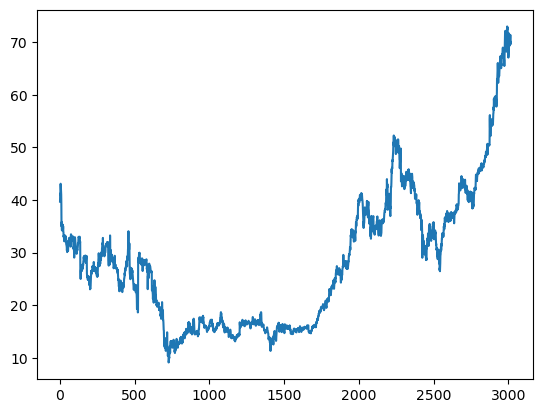

In [11]:
data = np.array(csv[['Open']])
plt.plot(data)

In [14]:
# Function to create sequences
def create_sequences(data, seq_len):
    xs = []
    ys = []
    for i in range(len(data) - seq_len):
        xs.append(data[i:(i + seq_len)])
        ys.append(data[i + seq_len])
    return np.array(xs), np.array(ys)

In [50]:

seq_length = 7


X, y = create_sequences(data, seq_length)


# Reshape X for RNN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [55]:
# 2. Build the RNN model
model = Sequential([
    SimpleRNN(units=64, activation='tanh'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
68/68 [==============================] - 1s 4ms/step - loss: 15.9359 - val_loss: 34.6189
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 9.2327 - val_loss: 28.7563
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 6.9564 - val_loss: 26.7086
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 5.3808 - val_loss: 23.6603
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 3.8854 - val_loss: 20.7472
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 2.7169 - val_loss: 18.0417
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 1.8780 - val_loss: 15.8162
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 1.3734 - val_loss: 14.2248
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 1.1095 - val_loss: 12.8424
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.9039 - val_loss: 11.622

19/19 [==============================] - 0s 1ms/step


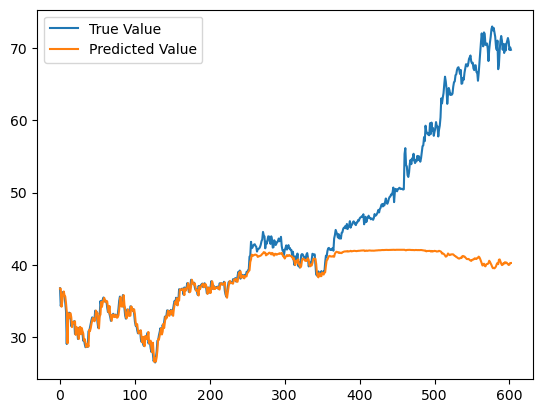

In [56]:
# 4. Evaluate
# Predict on the test data
predicted = model.predict(X_test)

# Plot the results
plt.plot(y_test, label='True Value')
plt.plot(predicted, label='Predicted Value')
plt.legend()
plt.show()

In [36]:
import time


class Clothing:
    def generate_label(self):
        pass

    def attach_label(self):
        print(self.generate_label())


class Shirt1(Clothing):
    def generate_label(self):
        return f"Shirt1 Manufactured on {time.ctime()} Label Attached"


class Trouser2(Clothing):
    def generate_label(self):
        return f"Trouser2 Manufactured on {time.ctime()} Label Attached"


class Jacket1(Clothing):
    def generate_label(self):
        return f"Jacket1 Manufactured on {time.ctime()} Label Attached"


In [37]:
Shirt().attach_label()

'Shirt Wed Feb 14 14:04:07 2024 Specific Label Attached'

In [26]:
class TextEditor:
    def __init__(self, text=''):
        self._text = text

    def write(self, text):
        self._text += text

    def save(self):
        with open('document.txt', 'w') as file:
            file.write(self._text)

    def read(self):
        with open('document.txt', 'r') as file:
            return file.read()


In [28]:
te = TextEditor()

te.write("hello")


In [31]:
te.save()

In [30]:
te.write("hello")
